In [1]:
# install the keras R package
install.packages("keras")

Installing package into 'C:/Users/anura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anura\AppData\Local\Temp\RtmpAjG5ef\downloaded_packages


In [2]:
# Install the core keras library + TensorFlow
library(keras)

In [3]:
install_keras()


Installation complete.



In [4]:
#install_keras(tensorflow = "gpu")

In [5]:
fashion_mnist <- dataset_fashion_mnist()

In [6]:
#fashion_mnist

In [7]:
# Test_Train split
tain_images <- fashion_mnist$train$x

In [8]:
c(train_images,train_labels) %<-% fashion_mnist$train

In [9]:
c(test_images, test_labels) %<-% fashion_mnist$test

In [10]:
# Explore data structure
dim(train_images)


[1] 60000    28    28

In [11]:
str(train_images)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [12]:
#plotting the image

In [13]:
fobject <- train_images[9,,]

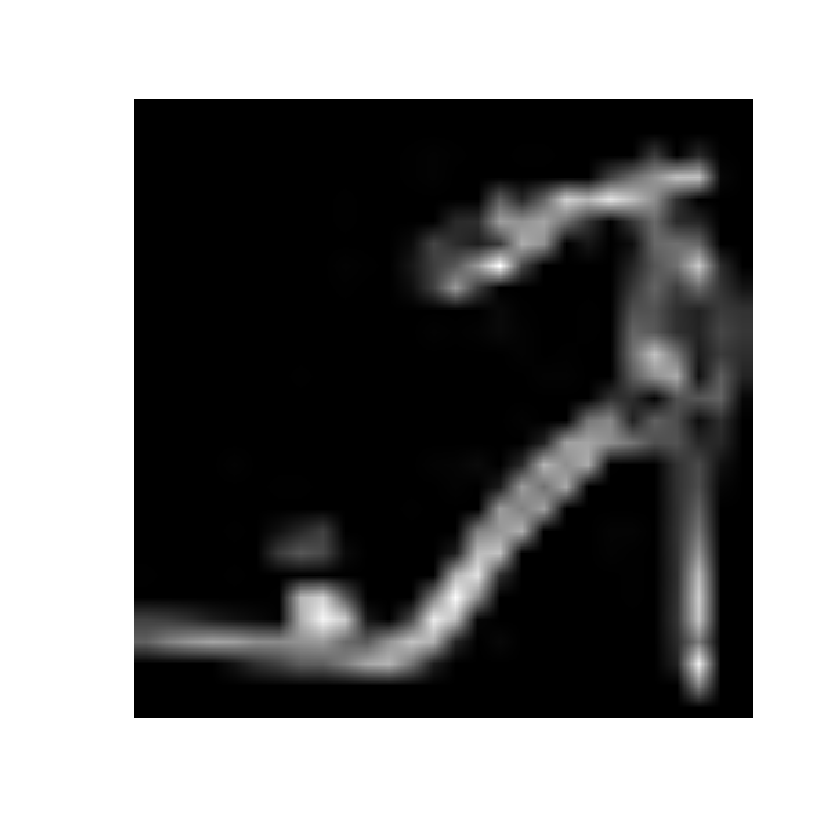

In [14]:
plot(as.raster(fobject, max = 255))

In [15]:
class_names = c('T-Shirt/top','Trouster','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

In [17]:
class_names[train_labels[9]+1]

[1] "Sandal"

In [18]:
# Normalizing [(X-mean)/std.Dev]

train_images <- train_images / 255

In [19]:
test_images <- test_images / 255

In [20]:
# Creating a validation split-used for hyperparameter tuning

In [21]:
# creating a validation split - used for hyperparameter tuning
val_indices <- 1:5000
val_images <- train_images[val_indices,,]
part_train_images <- train_images[-val_indices,,]
val_labels <- train_labels[val_indices]
part_train_lables <- train_labels[-val_indices]


In [22]:
# Flattening
# X X X
# Y Y Y -> X X X Y Y Y Z Z Z
# Z Z Z

In [23]:
model <- keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(28,28)) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')


In [24]:
model %>% compile(
  optimizer = 'sgd',
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
  
)

# sparse_categorical_crossentropy => more than 2 classes and observation can belong only one class
# Binary_crossentropy => 2 classes and object belongs to one of the two classes
# categorical_crossentropy => more than 2 classes and observation can belong to multiple classes


In [25]:
model %>% fit(part_train_images, part_train_lables, epochs = 30, batch_size =100, validation_data=list(val_images,val_labels))


In [26]:

# Test performance
score <- model %>% evaluate(test_images, test_labels)


In [27]:

cat('Test loss:', score$loss, "\n")
cat('Test accuracy:', score$acc,"\n")


Test loss: 0.4118397 
Test accuracy: 0.8538 


[1] 4.603819e-06 3.484550e-06 1.276044e-05 1.140941e-05 3.649931e-06
 [6] 6.921144e-02 5.914158e-05 1.593064e-01 1.432453e-03 7.699546e-01

[1] 10

[1] "Ankle boot"

[1] 9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0

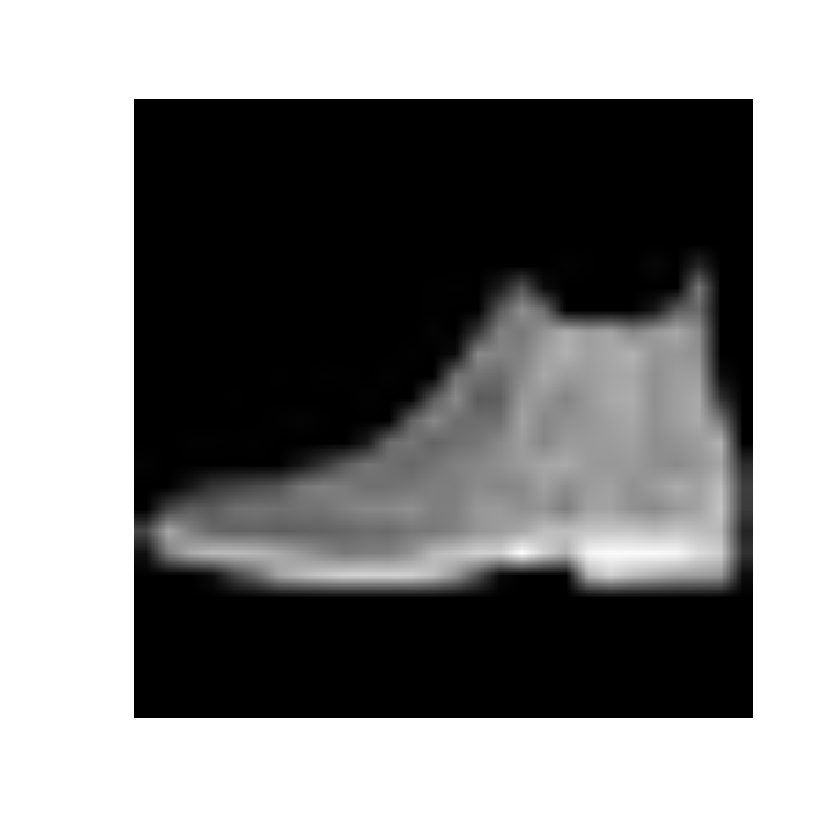

In [28]:
# Predicting on Test set
predictions <- model %>% predict(test_images)
predictions[1,]
which.max(predictions[1, ])
class_names[which.max(predictions[1, ])]
plot(as.raster(test_images[1,,],max = 1))

class_pred <- model %>% predict_classes(test_images)
class_pred[1:20]

